# Home Credit Default Risk

Name : Hilal Amirudin

[LinkedIn](https://www.linkedin.com//in/hilal-amirudin/)

# Introduction

## Background Problem

Credit risk refers to the risk associated with lending money by financial institutions. It involves the possibility that borrowers may not be able to repay the loan on time or fail to repay the loan altogether. Factors such as lending policies, economic conditions, and borrowers' ability to repay impact credit risk. To manage this risk, financial institutions conduct credit analysis and utilize predictive models. They also implement strict risk management policies and strategies. By effectively managing credit risk, financial institutions can protect their assets and maintain operational stability.

## Problem Statement

How to develop an accurate prediction model to classify credit owners as payers or defaulters in Indonesian Home Credit financing services?

In this case, some appropriate metrics to evaluate the performance of a credit default risk prediction model are:

* ROC-AUC: This metric measures the model's ability to distinguish between the positive class (default) and the negative class (non-default). ROC-AUC provides an overall assessment of the model's performance by considering the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity). A higher ROC-AUC value indicates better performance in predicting credit default risk.

* Recall (Sensitivity): This metric measures the extent to which defaulting credit owners can be identified by the model. Recall provides an understanding of the proportion of actual defaulting credit owners that the model successfully identifies. Recall is important to assess how well the model can detect credit default risk.

* NPL (Non-Performing Loan) : This metrics are crucial for evaluating the quality of a lender's loan portfolio and assessing the level of credit risk. NPL metrics provide insights into the percentage of loans that are in default or are experiencing payment delinquencies. These metrics help lenders monitor the health of their loan portfolio and identify potential risks. One commonly used NPL metric is the NPL ratio, which is calculated by dividing the total outstanding amount of non-performing loans by the total loan portfolio. This ratio indicates the proportion of loans that are in default or are at high risk of default. A higher NPL ratio suggests a higher level of credit risk and may indicate potential financial strain on the lender.

# Import Library

Library used in this assignment

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Modeling
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from imblearn.under_sampling import RandomUnderSampler

# Saving
import pickle
import json

In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Loading

## Current Application

### Load Data

In [168]:
# Load Dataset

client_data = pd.read_csv ('/content/drive/Othercomputers/My MacBook Air/Final Project/home-credit-default-risk/application_train.csv')

In [169]:
# Show first dataset

client_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


In [170]:
# show last dataset

client_data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.00,254700.00,27558.00,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.00,269550.00,12001.50,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.00,677664.00,29979.00,...,0,0,0,0,1.00,0.00,0.00,1.00,0.00,1.00
307509,456254,1,Cash loans,F,N,Y,0,171000.00,370107.00,20205.00,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
307510,456255,0,Cash loans,F,N,N,0,157500.00,675000.00,49117.50,...,0,0,0,0,0.00,0.00,0.00,2.00,0.00,1.00


In [171]:
# Check Data types

client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [172]:
client_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,...,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,...,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,...,0.09,0.02,0.02,0.02,0.08,0.11,0.20,0.92,0.79,1.87
min,100002.00,0.00,0.00,25650.00,45000.00,1615.50,40500.00,0.00,-25229.00,-17912.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,189145.50,0.00,0.00,112500.00,270000.00,16524.00,238500.00,0.01,-19682.00,-2760.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,278202.00,0.00,0.00,147150.00,513531.00,24903.00,450000.00,0.02,-15750.00,-1213.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,367142.50,0.00,1.00,202500.00,808650.00,34596.00,679500.00,0.03,-12413.00,-289.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,456255.00,1.00,19.00,117000000.00,4050000.00,258025.50,4050000.00,0.07,-7489.00,365243.00,...,1.00,1.00,1.00,1.00,4.00,9.00,8.00,27.00,261.00,25.00


The mean of a variable in a dataset is greater than its standard deviation, it suggests that the distribution of values is positively skewed. This means that the data is concentrated towards the lower end of the scale and has a long tail on the higher end.

### Data Duplicate

In [173]:
# Check Duplicate data
client_data[client_data.duplicated(keep=False)]


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


There's no data duplicated

In [174]:
# Make a data copy

df = client_data.copy()

### Numerical and Categorical

In [301]:
# Get numerical

num_cols = df.select_dtypes(include=np.number).columns.tolist()

In [302]:
# Get Categorical

cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [303]:
# Get numerical in categorical colum

cat_num_cols = ['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21'
 ]

# EDA

## Customer Demographic

In [183]:
# SELECT DESIRE COLUMN
selected_demographic = [
    'TARGET',
    'REGION_POPULATION_RELATIVE',
    'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY'
]

# Creating a new dataframe with the selected columns

customer_demographic = df[selected_demographic].copy()

### Region Rating

In [184]:
# Using groupby for region rating client

rg = customer_demographic.groupby(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'TARGET'])['TARGET'].count().reset_index(name='count')

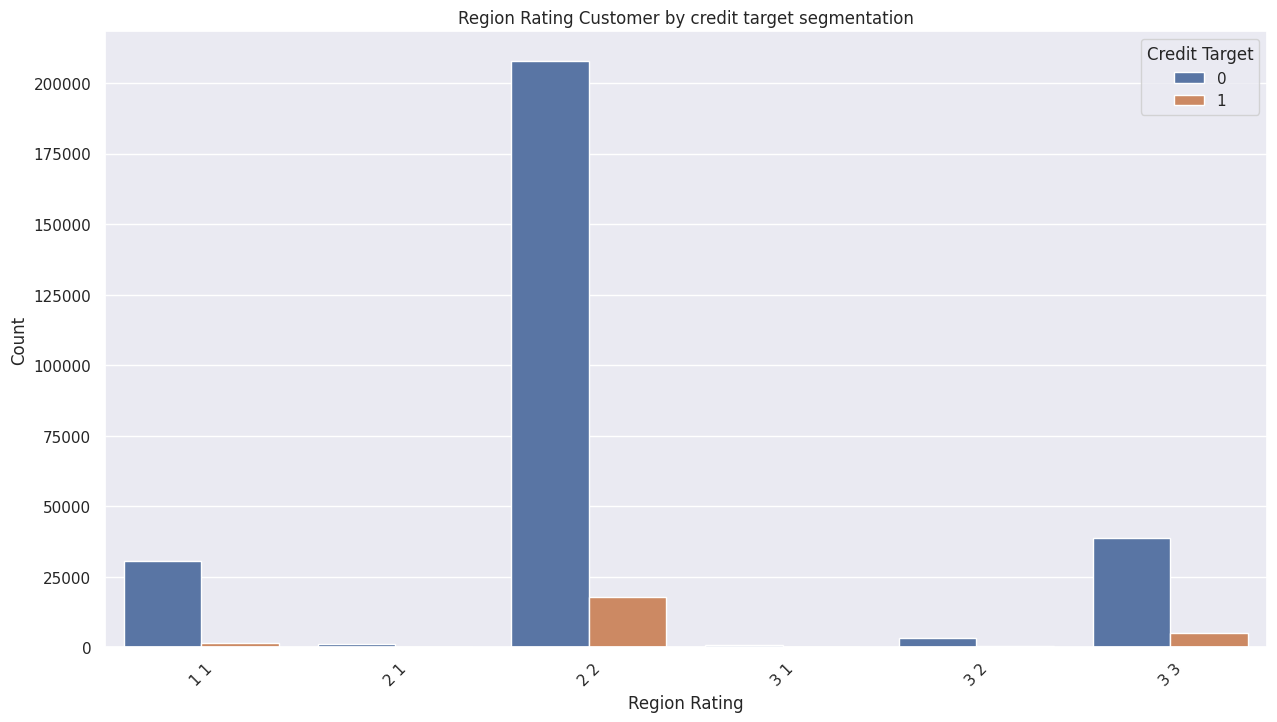

In [185]:
# Concatenate the two columns into a single column
rg['Region_Rating'] = rg['REGION_RATING_CLIENT'].astype(str) + ' ' + rg['REGION_RATING_CLIENT_W_CITY'].astype(str)

# Show plot by target
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
sns.barplot(x='Region_Rating', y='count', hue='TARGET', data=rg)
plt.title('Region Rating Customer by credit target segmentation')
plt.xlabel('Region Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit Target')
plt.show()

Customer dominated in region rating 2

### Region Population

In [186]:
# Using groupby for region population

ty = customer_demographic.groupby(['REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'TARGET'])['TARGET'].count().reset_index(name='count')

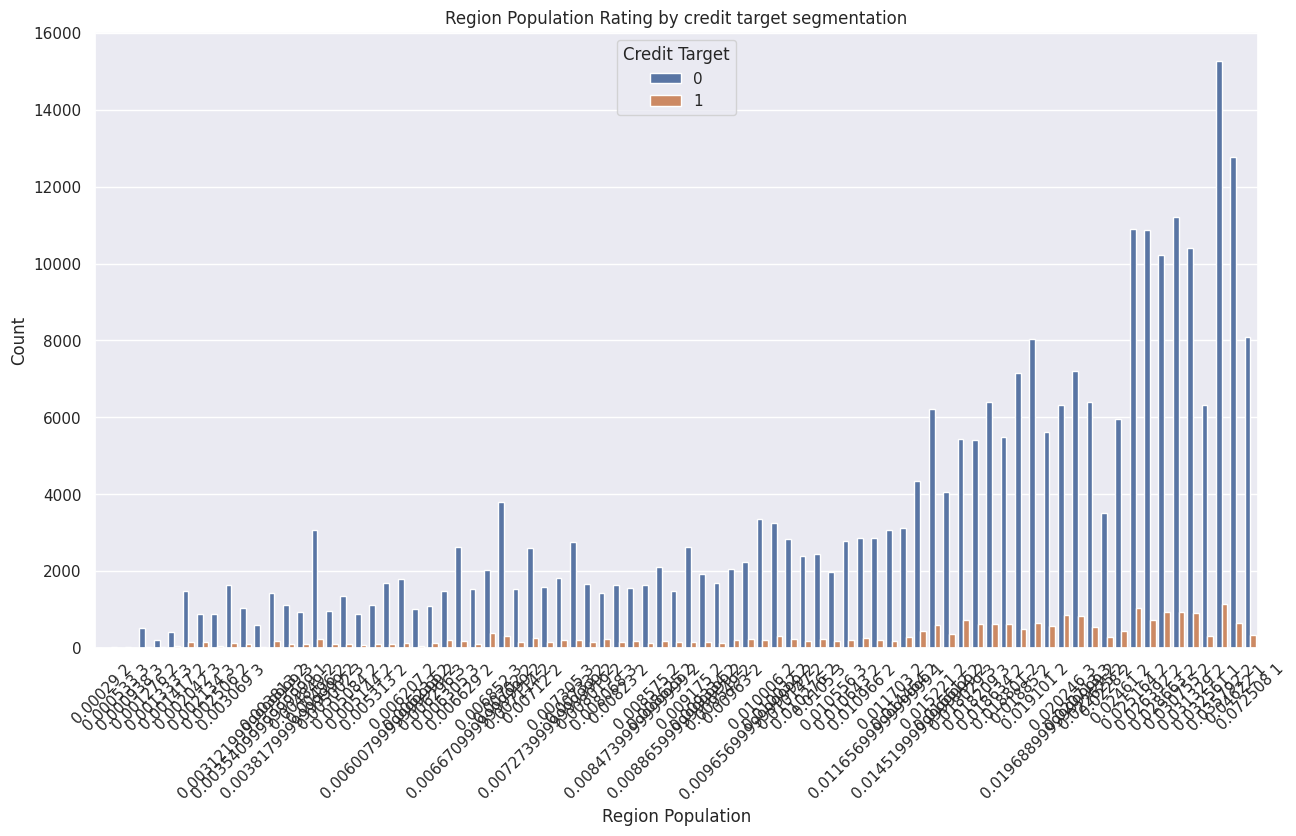

In [187]:
# Concatenate the two columns into a single column
ty['Region_Population_Rating'] = ty['REGION_POPULATION_RELATIVE'].astype(str) + ' ' + ty['REGION_RATING_CLIENT'].astype(str)

# Show plot by target
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
sns.barplot(x='Region_Population_Rating', y='count', hue='TARGET', data=ty)
plt.title('Region Population Rating by credit target segmentation')
plt.xlabel('Region Population')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit Target')
plt.show()

### Region Live and Work

In [188]:
# Using groupby for region live and work

qq = customer_demographic.groupby(['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'TARGET'])['TARGET'].count().reset_index(name='count')

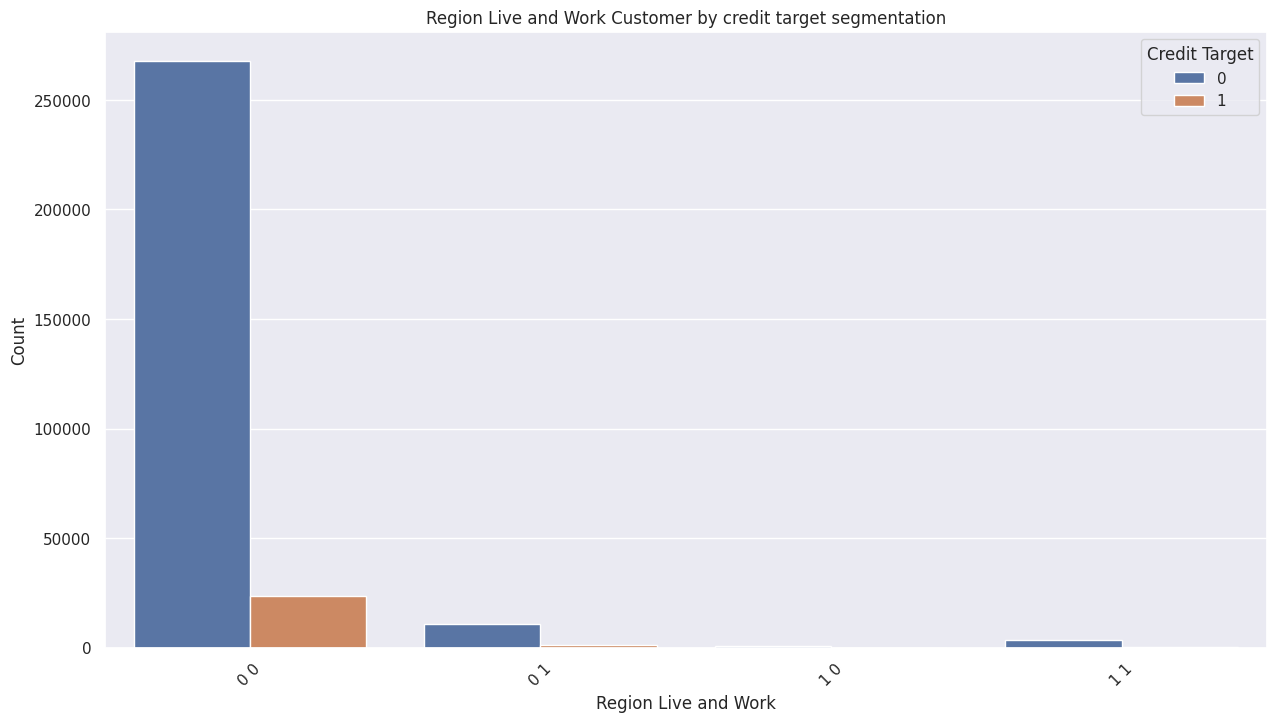

In [189]:
# Concatenate the two columns into a single column
qq['Region_Live_Work'] = qq['REG_REGION_NOT_LIVE_REGION'].astype(str) + ' ' + qq['REG_REGION_NOT_WORK_REGION'].astype(str)

# Show plot by target
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
sns.barplot(x='Region_Live_Work', y='count', hue='TARGET', data=qq)
plt.title('Region Live and Work Customer by credit target segmentation')
plt.xlabel('Region Live and Work')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit Target')
plt.show()

### Region Work

In [190]:
# Using groupby for region work

ww = customer_demographic.groupby(['REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'TARGET'])['TARGET'].count().reset_index(name='count')

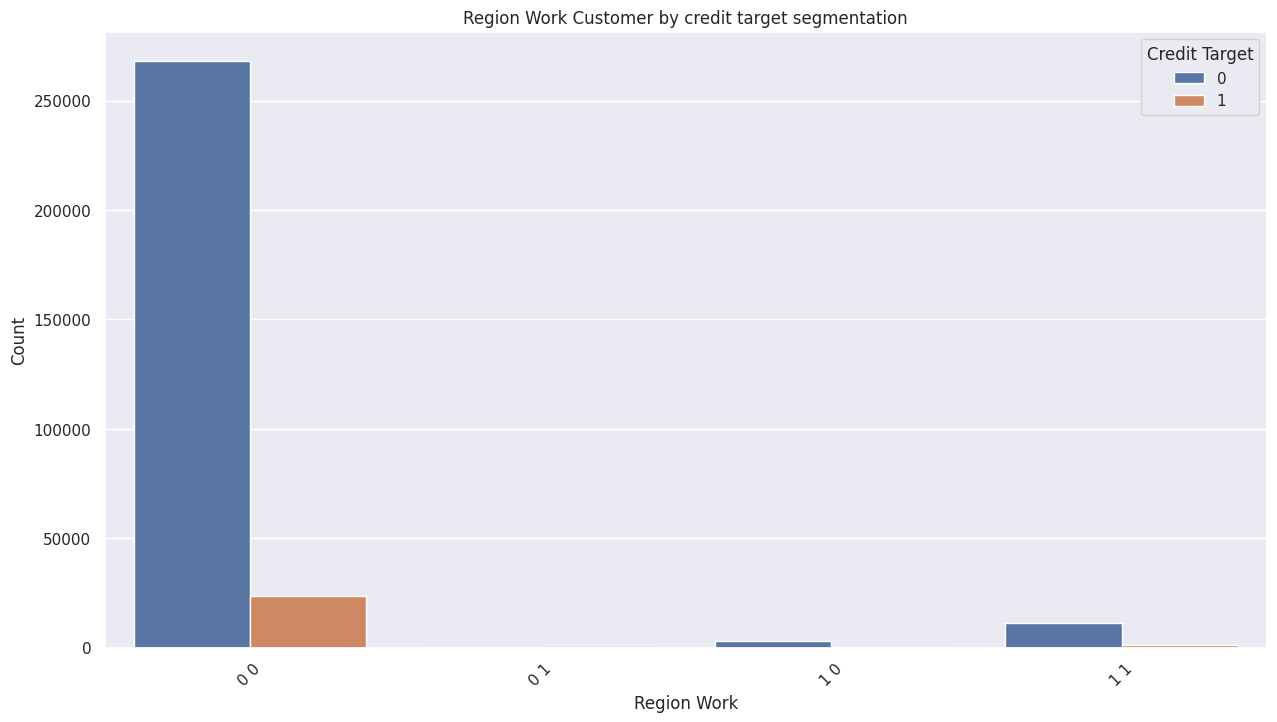

In [191]:
# Concatenate the two columns into a single column
ww['Region_Work'] = ww['REG_REGION_NOT_WORK_REGION'].astype(str) + ' ' + ww['LIVE_REGION_NOT_WORK_REGION'].astype(str)

# Show plot by target
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
sns.barplot(x='Region_Work', y='count', hue='TARGET', data=ww)
plt.title('Region Work Customer by credit target segmentation')
plt.xlabel('Region Work')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit Target')
plt.show()

### City Live and Work

In [192]:
# Using groupby for city live and work

ee = customer_demographic.groupby(['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET'])['TARGET'].count().reset_index(name='count')

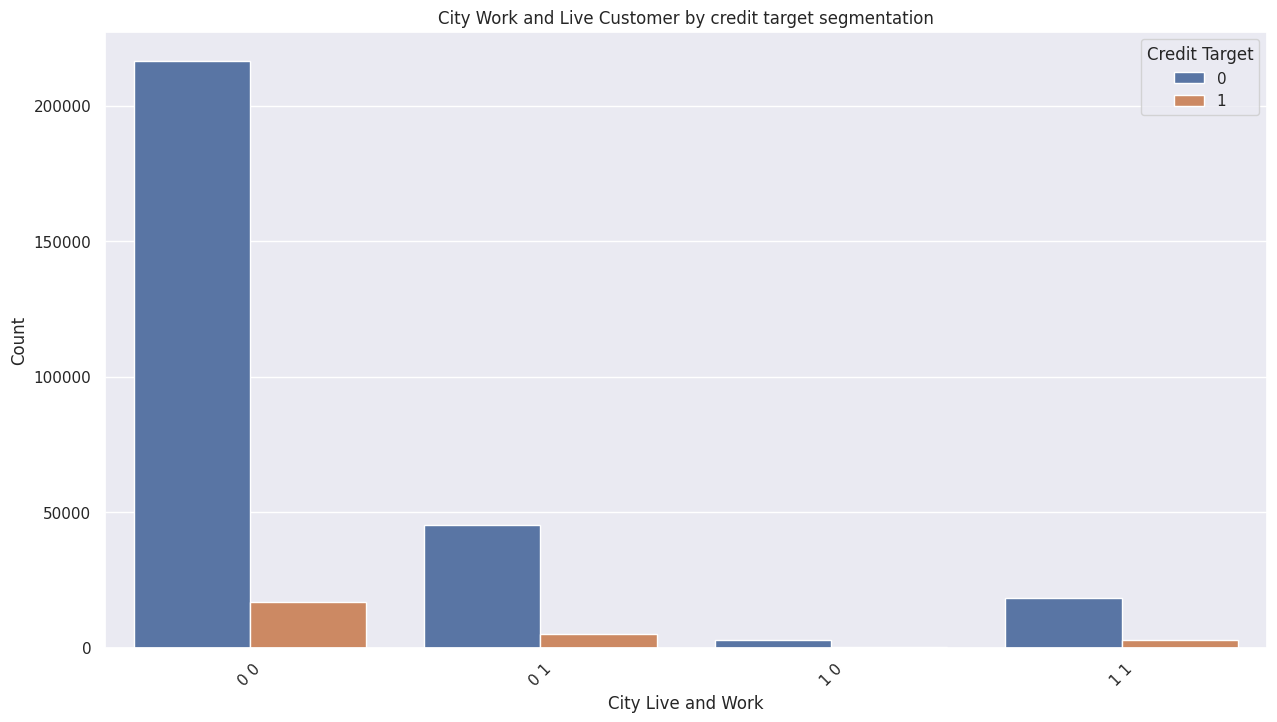

In [193]:
# Concatenate the two columns into a single column
ee['city_live_work'] = ee['REG_CITY_NOT_LIVE_CITY'].astype(str) + ' ' + ee['REG_CITY_NOT_WORK_CITY'].astype(str)

# Show plot by target
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
sns.barplot(x='city_live_work', y='count', hue='TARGET', data=ee)
plt.title('City Work and Live Customer by credit target segmentation')
plt.xlabel('City Live and Work')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit Target')
plt.show()

### City Work

In [194]:
# Using groupby for city work

rr = customer_demographic.groupby(['REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'TARGET'])['TARGET'].count().reset_index(name='count')

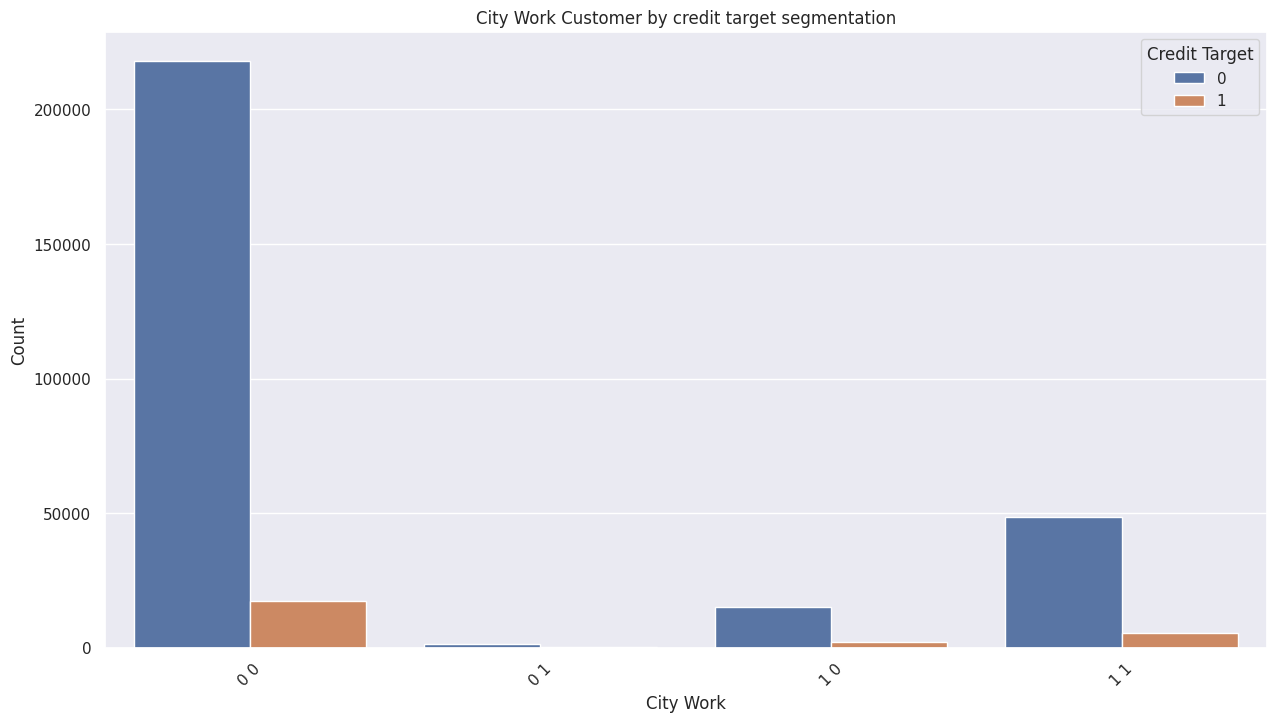

In [195]:
# Concatenate the two columns into a single column
rr['city_work'] = rr['REG_CITY_NOT_WORK_CITY'].astype(str) + ' ' + rr['LIVE_CITY_NOT_WORK_CITY'].astype(str)

# Show plot by target
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
sns.barplot(x='city_work', y='count', hue='TARGET', data=rr)
plt.title('City Work Customer by credit target segmentation')
plt.xlabel('City Work')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit Target')
plt.show()

### Correlation

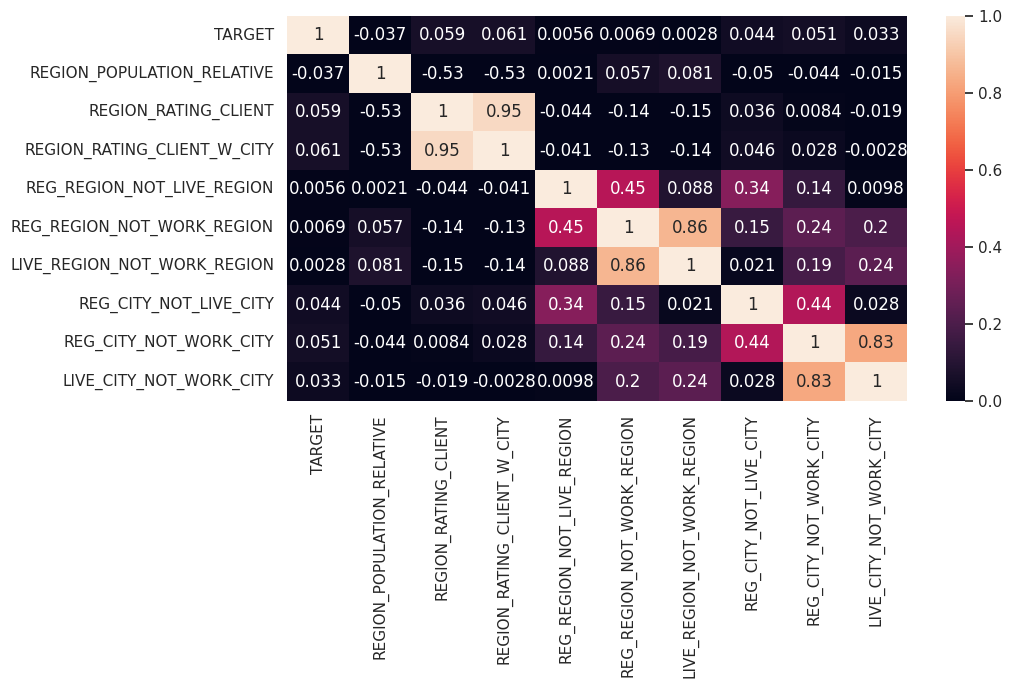

In [196]:
# Check Correlation by heatmap

corr = customer_demographic.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

### Conclusion Customer Demographic

After conducting correlation analysis using a heatmap, here are the conclusions regarding customer demographics:

1. Region Rating Client with Region Rating Client City, correlation value of 0.95.
The strong correlation between the region rating and the city rating indicates a high relevance between assessing regions in general and considering the specific cities within those regions. This information can be used by the company to develop better strategies or policies related to regions and cities where customers reside.

2. Live region not work region with Region city not work city, correlation value of 0.86.
There is a distinction between the residential region and the working region, suggesting a likelihood of different addresses between the city of residence and the city of work. This can be influenced by factors such as population mobility, the need to live closer to the workplace, or variations in location preferences. The company can leverage this information to improve marketing strategies or target customers by considering the suitability of residential and working locations.

3. Region city not work city with live city not work city, correlation value of 0.83.
There is a difference in addresses between the city of work and the city of residence, which likely extends to regional levels. In other words, address mismatch at the city level (Region city not work city) can reflect address mismatch at the regional level (Live city not work city). The company can assess risks or make financing-related decisions based on this information. Significant differences between residential and working addresses at the city level can be considered as potential risk factors for payment delays or customers' ability to meet financial obligations.

4. Region not live region with region not work region, correlation value of 0.45.
This indicates that address mismatches at the regional level (Region not live region) do not always translate into address mismatches at the working region level (Region not work region). In other words, address mismatch at the regional level does not necessarily imply a mismatch at the working region level.

5. Region city not live city with region city not work city, correlation value of 0.44.
This suggests that address mismatches at the city level (Region city not live city) do not significantly affect address mismatches at the working city level (Region city not work city). The company can use this information to understand that address mismatch at the city level may not be the most significant or relevant factor in understanding address mismatches at the working city level. This consideration can be useful in developing business strategies or making financing-related decisions.



## Customer Segmentation

### Gender Proportion

In [197]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [198]:
# Drop colun XNA

df = df[df['CODE_GENDER']!='XNA']

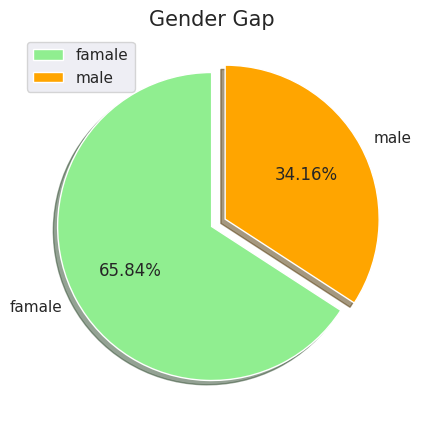

In [199]:
labels= ['famale','male']
size=df['CODE_GENDER'].value_counts()
colors=['lightgreen','orange']
explode =[0, 0.1]

fig, axes= plt.subplots(figsize=(8,5))
plt.pie(size, colors= colors, explode=explode,
        labels=labels, shadow=True, startangle= 90,
        autopct='%.2f%%')

plt.title('Gender Gap', fontsize=15)
plt.legend()
plt.show()

Our client dominated with highly famale customer about 65.84% than a male

### Age Cathegory

In [200]:
# define age columns

df['AGE'] = df['DAYS_BIRTH'] / -365
df['AGE'] = df['AGE'].apply(round)

In [201]:
# grouping age of customer

age_cat = []

for i in df['AGE']:
    if i < 35:
        age_cat.append('Young Adult')
    elif i < 55:
        age_cat.append('Adult')
    else:
        age_cat.append('Older')

df['AGE_CATEGORY'] = age_cat

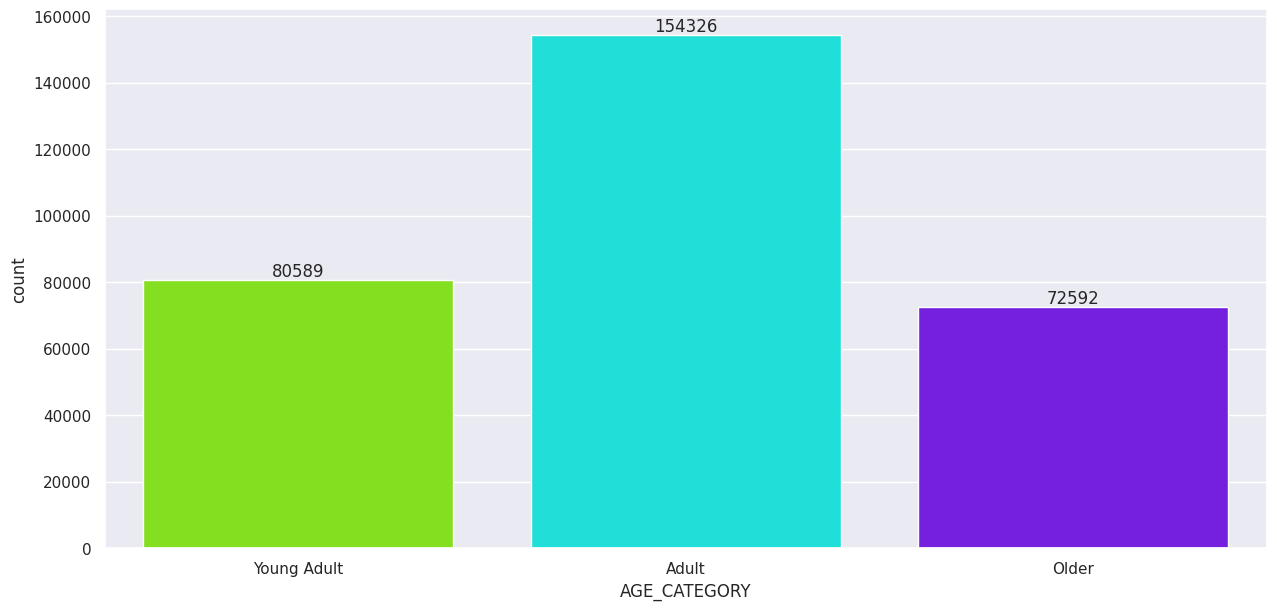

In [202]:
# Show Age Category in Plot

plt.figure(figsize=(15, 7))
ax = sns.countplot(x=df['AGE_CATEGORY'], palette='hsv')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Our Customer dominated with adult customer (35-55) and following with young adult (under 35 years old)

### Employee

In [203]:
# define year employed

df['YEAR_EMPLOYED'] = df['DAYS_EMPLOYED'] / -365
df['YEAR_EMPLOYED'] = df['YEAR_EMPLOYED'].apply(round)
bins= [1, 10,26,33, 46, 81]
df['Year Employed']= pd.cut(df['YEAR_EMPLOYED'], bins=bins, labels=['1-9','10-25','26-35','35-55','55-80'])

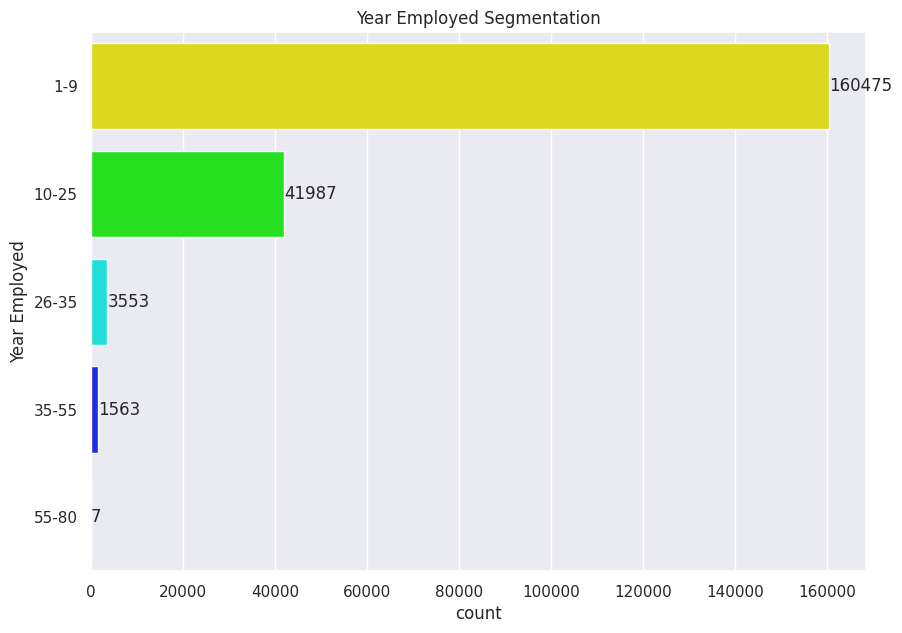

In [204]:
# Show Year Employ in Plot

plt.figure(figsize=(10, 7))
ax = sns.countplot(y=df['Year Employed'], palette='hsv')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Year Employed Segmentation')
plt.show()

Our customer dominated with working ratio 1-9 years

### Registration

In [205]:
# define year registration

df['YEAR_REGISTRATION'] = df['DAYS_REGISTRATION'] / -365
df['YEAR_REGISTRATION'] = df['YEAR_REGISTRATION'].apply(round)
bins= [1, 10,26,33, 46, 81]
df['Year Registration']= pd.cut(df['YEAR_REGISTRATION'], bins=bins, labels=['1-9','10-25','26-35','35-55','55-80'])

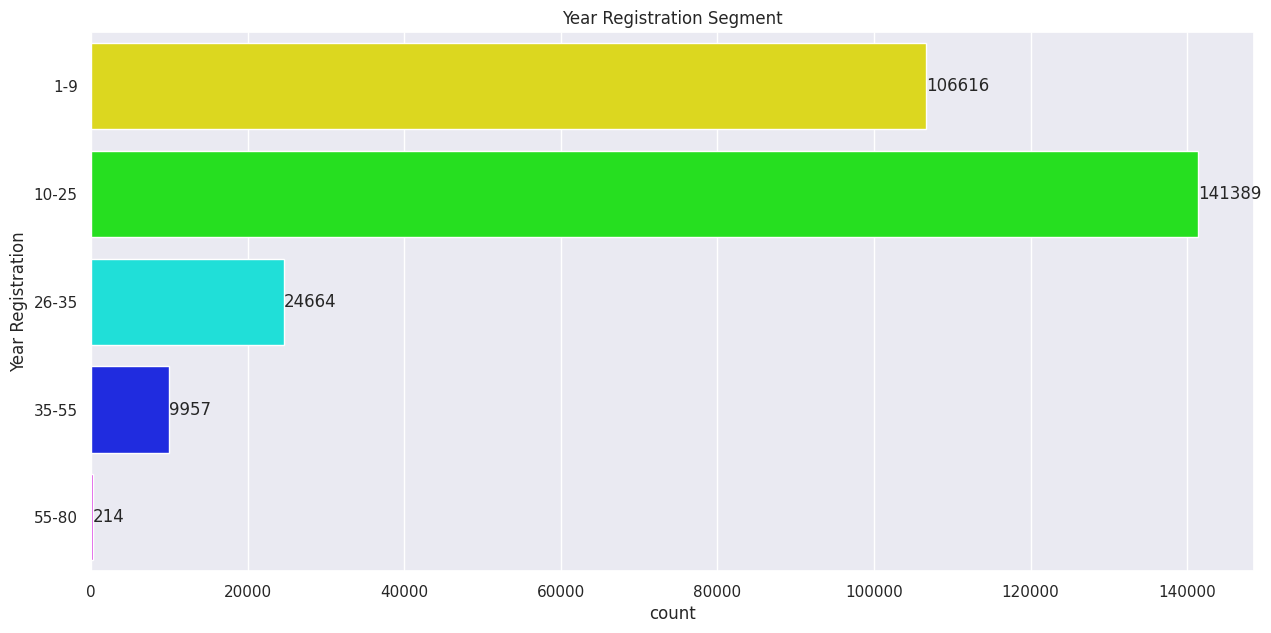

In [206]:
# Show Year registration in Plot

plt.figure(figsize=(15, 7))
ax = sns.countplot(y=df['Year Registration'], palette='hsv')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Year Registration Segment')
plt.show()

### Income Customer

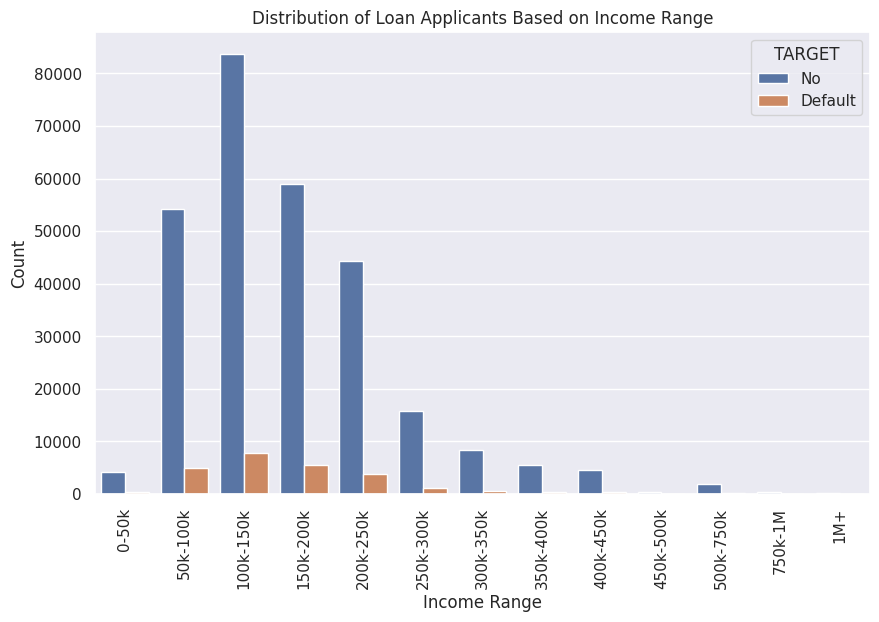

In [207]:
# Define the income range bins
income_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 750000, 1000000, np.inf]
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-750k', '750k-1M', '1M+']

# Create a new column 'INCOME_RANGE' by cutting the AMT_INCOME_TOTAL variable into bins
df['INCOME_RANGE'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='INCOME_RANGE', hue='TARGET', data=df)
ax.set_xlabel('Income Range')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Income Range')
plt.xticks(rotation=90)

# Change legend labels
plt.legend(title='TARGET', labels=['No', 'Default'])
plt.show()

Our debitur dominated income in range 50.000 to 250.000 rupiah

### Income source of customer

In [208]:
# Count column category 'NAME_INCOME_TYPE'
income_counts = df['NAME_INCOME_TYPE'].value_counts()

# Sorting values
income_counts_sorted = income_counts.sort_values(ascending=False)

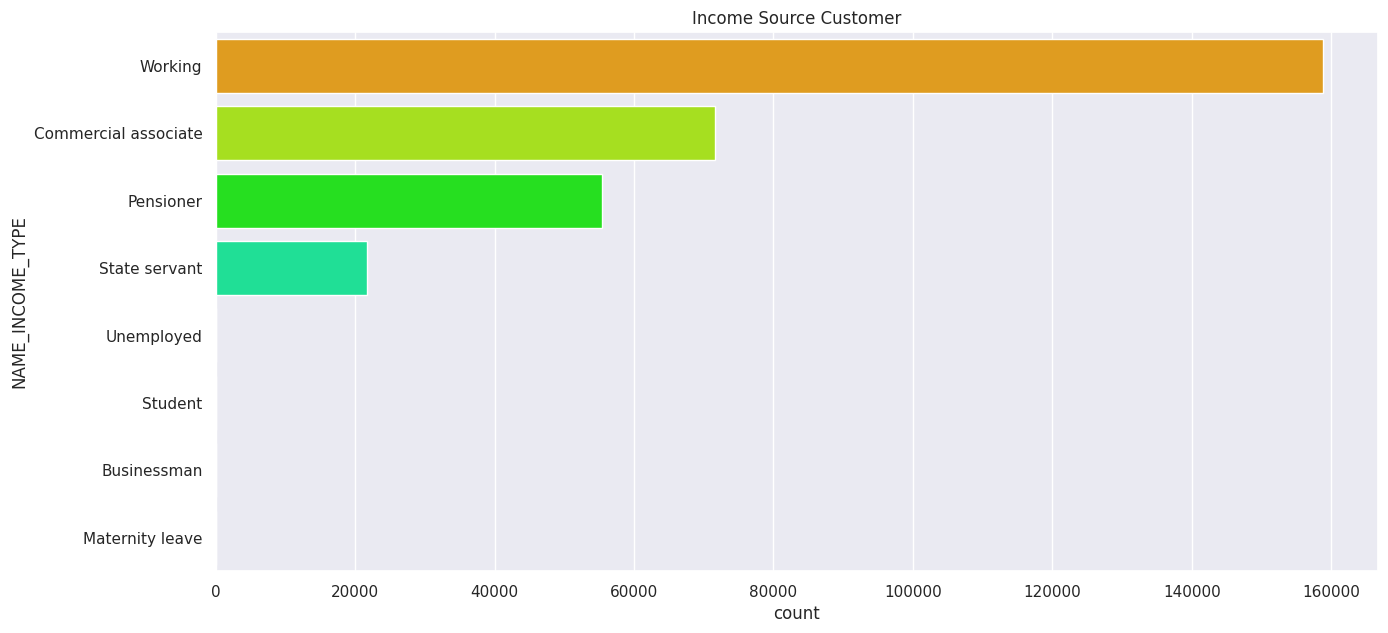

In [209]:
# Show in plot

plt.figure(figsize=(15, 7))
sns.countplot(y=df['NAME_INCOME_TYPE'], order=income_counts_sorted.index, palette='hsv')
plt.title('Income Source Customer')
plt.show()

our customer income dominated come from working class

## Loan Details

### Target Ratio

In [210]:
# query target count

target_count = df['TARGET'].value_counts()
target_count

0    282682
1     24825
Name: TARGET, dtype: int64

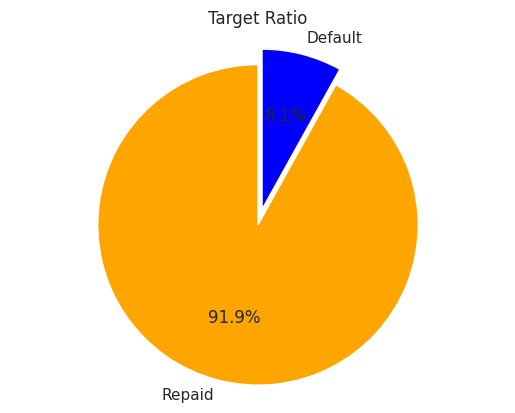

In [211]:
# Plotting pie chart
plt.pie(target_count,
        labels=['Repaid', 'Default'], startangle=90,
        colors=['orange', 'blue'],
        autopct='%1.1f%%', explode=[0,0.1])
plt.axis('equal')
plt.title('Target Ratio')

plt.show()

### Types of Loan

In [212]:
df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29275
Name: NAME_CONTRACT_TYPE, dtype: int64

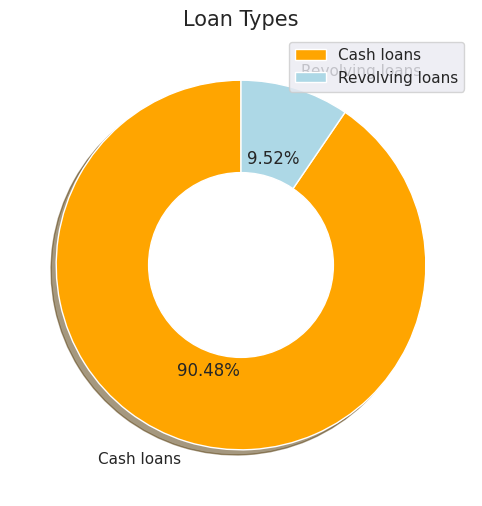

In [213]:
labels = df['NAME_CONTRACT_TYPE'].unique()
size = df['NAME_CONTRACT_TYPE'].value_counts()
colors = ['orange', 'lightblue']  # Corrected color name for 'lightblue'

fig, axes = plt.subplots(figsize=(8, 6))
plt.pie(size, colors=colors, labels=labels, shadow=True, startangle=90, autopct='%.2f%%', wedgeprops={'edgecolor': 'white'})

# Create a white circle in the middle to make it a donut chart
circle = plt.Circle((0, 0), 0.5, color='white')
fig.gca().add_artist(circle)

plt.title('Loan Types', fontsize=15)
plt.legend()
plt.show()

Our customer dominated provide loan for cash loan than Revolving loans

### Loan Purpose

In [214]:
# Data for the first pie chart
labels1 = df['FLAG_OWN_CAR'].unique()
size1 = df['FLAG_OWN_CAR'].value_counts()
colors1 = ['green', 'red']

# Data for the second pie chart
labels2 = df['FLAG_OWN_REALTY'].unique()
size2 = df['FLAG_OWN_REALTY'].value_counts()
colors2 = ['yellow', 'purple']

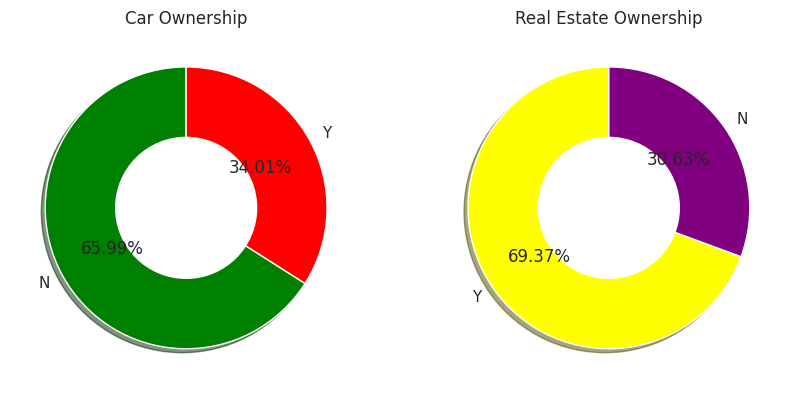

In [215]:
# show in donut chart
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Second pie chart
axes[0].pie(size1, colors=colors1, labels=labels1, shadow=True, startangle=90, autopct='%.2f%%', wedgeprops={'edgecolor': 'white'})
circle2 = plt.Circle((0, 0), 0.5, color='white')
axes[0].add_artist(circle2)
axes[0].set_title('Car Ownership')

# Third pie chart
axes[1].pie(size2, colors=colors2, labels=labels2, shadow=True, startangle=90, autopct='%.2f%%', wedgeprops={'edgecolor': 'white'})
circle2 = plt.Circle((0, 0), 0.5, color='white')
axes[1].add_artist(circle2)
axes[1].set_title('Real Estate Ownership')

plt.show()

Our customer use loan for Car ownership 34% and Real Estate 69%. The distribution of loan purposes indicates potential market opportunities in the car ownership and real estate sectors. Lenders can assess market demand, competition, and profitability in these areas to make informed decisions about business strategies, partnerships, or product development. By focusing on these popular loan purposes, lenders can position themselves as industry leaders in providing financing options for car ownership and real estate investments.

### Loan Credit Range

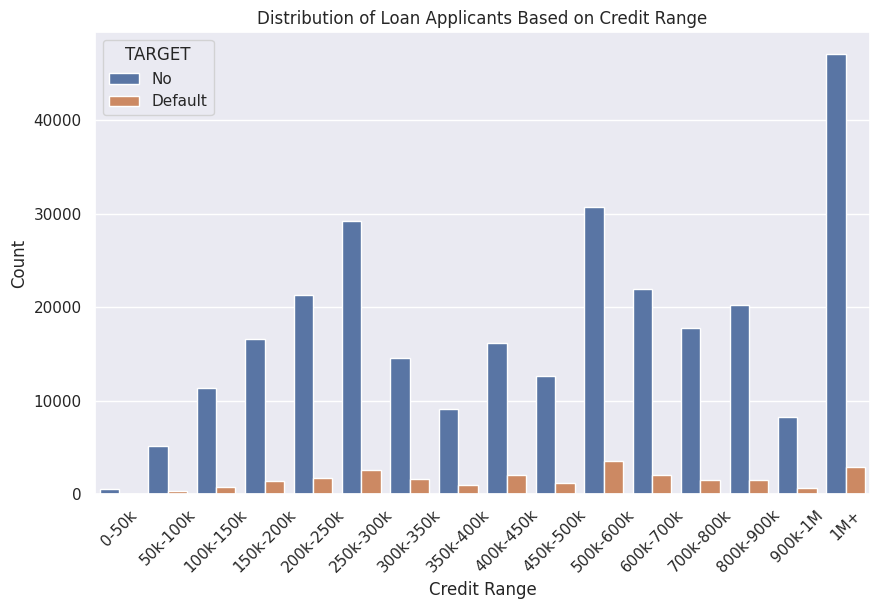

In [216]:
# Define the credit range bins
credit_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 600000, 700000, 800000, 900000, 1000000, np.inf]
credit_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-1M', '1M+']

# Create a new column 'CREDIT_RANGE' by cutting the AMT_CREDIT variable into bins
df['CREDIT_RANGE'] = pd.cut(df['AMT_CREDIT'], bins=credit_bins, labels=credit_labels)

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CREDIT_RANGE', hue='TARGET', data=df)
ax.set_xlabel('Credit Range')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Credit Range')
plt.xticks(rotation=45)

# Change legend labels
plt.legend(title='TARGET', labels=['No', 'Default'])
plt.show()

Our debitur dominated to make loan in range credit 200k-250k , 400k-450K, and 1 Million.

### Non-Performing Loan

In [217]:
# groupby amt credit

npl = df.groupby('TARGET')['AMT_CREDIT'].sum().reset_index(name='total_credit')

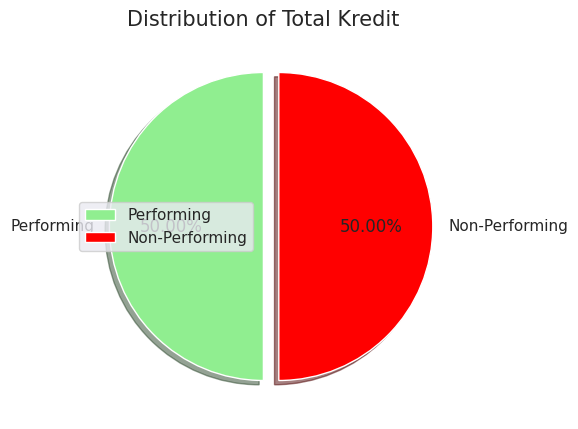

In [218]:
# show pie chart distribution

labels= ['Performing', 'Non-Performing']
size=npl['total_credit'].value_counts()
colors=['lightgreen','red']
explode =[0, 0.1]

fig, axes= plt.subplots(figsize=(10,5))
plt.pie(size, colors= colors, labels=labels, explode=explode, shadow=True, startangle= 90,
        autopct='%.2f%%')

plt.title('Distribution of Total Kredit', fontsize=15)
plt.legend()
plt.show()

The gap between performing and non-performing customers is nearly the same, but what about the NPL (Non-Performing Loan) ratio? Referring to Bank Indonesia Regulation No. 06/10/PBI/2004 dated 12 April 2004 regarding the Assessment System for the Soundness of Commercial Banks, it states that the non-performing loan ratio should be 5%. The higher the NPL ratio of a financial institution, the more it will lead to a decrease in its earnings.

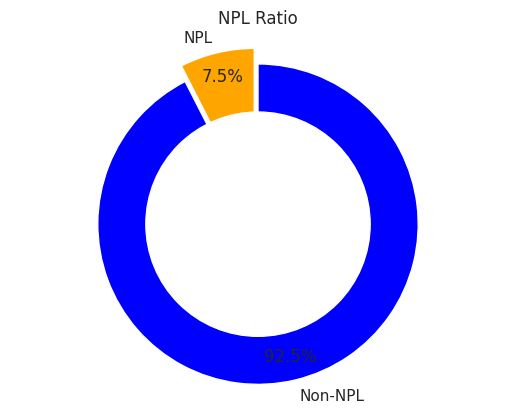

In [219]:
# Calculating Total NPL
total_npl = df.loc[df['TARGET'] == 1, 'AMT_CREDIT'].sum()

# Calculating Total Credit
total_kredit = df['AMT_CREDIT'].sum()

# Calculating NPL Ratio
rasio_npl = (total_npl / total_kredit) * 100

# Calculating Non-NPL Ratio
rasio_non_npl = 100 - rasio_npl

# Creating a donut chart
labels = ['NPL', 'Non-NPL']
sizes = [rasio_npl, rasio_non_npl]
colors = ['orange', 'blue']
explode = (0.1, 0)  # memberikan efek exploded pada bagian NPL

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# Creating a circle at the center to make a hole in the donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Adding a title
plt.title('NPL Ratio')

# Displaying the donut chart
plt.axis('equal')
plt.show()

* Very healthy: NPL < 2%
* Healthy: 2% < NPL < 5%
* Moderately healthy: 5% < NPL < 8%
* Less healthy: 8% < NPL < 12%
* Unhealthy: NPL > 12%

With an NPL ratio of 7.5%, the company falls into the moderately healthy category in managing its NPL. However, it is still above the NPL percentage set by Bank Indonesia.

## Drop feature after EDA

In [313]:
# Drop column after EDA

df.drop(['AGE', 'AGE_CATEGORY', 'YEAR_EMPLOYED', 'Year Employed', 'YEAR_REGISTRATION', 'Year Registration' ], axis=1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,...,0,0,0.00,0.00,0.00,0.00,0.00,1.00,200k-250k,400k-450k
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,...,0,0,0.00,0.00,0.00,0.00,0.00,0.00,250k-300k,1M+
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,...,0,0,0.00,0.00,0.00,0.00,0.00,0.00,50k-100k,100k-150k
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,100k-150k,300k-350k
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,...,0,0,0.00,0.00,0.00,0.00,0.00,0.00,100k-150k,500k-600k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.00,254700.00,27558.00,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,150k-200k,250k-300k
307507,456252,0,Cash loans,F,N,Y,0,72000.00,269550.00,12001.50,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,50k-100k,250k-300k
307508,456253,0,Cash loans,F,N,Y,0,153000.00,677664.00,29979.00,...,0,0,1.00,0.00,0.00,1.00,0.00,1.00,150k-200k,600k-700k
307509,456254,1,Cash loans,F,N,Y,0,171000.00,370107.00,20205.00,...,0,0,0.00,0.00,0.00,0.00,0.00,0.00,150k-200k,350k-400k


## Check Missing Value

In [314]:
# Check Missing Value

miss_percentage = client_data.isna().mean() * 100

miss_val = miss_percentage[miss_percentage > 0]

# Convert miss_val to a dataframe
miss_val_df = pd.DataFrame({'Variable': miss_val.index, 'Missing Percentage': miss_val.values})

miss_val_df

,Variable,Missing Percentage
0,AMT_ANNUITY,0.00
1,AMT_GOODS_PRICE,0.09
2,NAME_TYPE_SUITE,0.42
3,OWN_CAR_AGE,65.99
4,OCCUPATION_TYPE,31.35
...,...,...
62,AMT_REQ_CREDIT_BUREAU_DAY,13.50
63,AMT_REQ_CREDIT_BUREAU_WEEK,13.50
64,AMT_REQ_CREDIT_BUREAU_MON,13.50
65,AMT_REQ_CREDIT_BUREAU_QRT,13.50


In [315]:
miss_val_df['Variable'].unique()

array(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOOR

Missing value checks include in category  MCAR, MAR, or MNAR

#### MCAR (Missing Completely At Random)

In [316]:

# Check missingness for each variable
missingness = client_data.isnull().mean()

# Test MCAR
is_mcar = np.allclose(missingness, np.mean(missingness))
print("Is MCAR?", is_mcar)

Is MCAR? False


It turns out that the missing values category is not MCAR Missing (Completely At Random)

#### MAR (Missing at Random)

In [317]:
# Calculate pairwise correlation between columns
correlation_matrix = client_data.corr()

# Check correlation of missingness for each column
missingness_corr = client_data.isnull().corr()

# Set diagonal elements to NaN
np.fill_diagonal(missingness_corr.values, np.nan)

# Check if any correlation between missingness and other variables
is_mar = missingness_corr.abs().sum().sum() == 0
print("Is MAR?", is_mar)

<ipython-input-317-d8d269c7c86e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = client_data.corr()


Is MAR? False


I assume that the missing value is of type MNAR.

## Handling missing value

Because our missing value MNAR type we can drop missing value above 40%

In [318]:
threshold = 40  # Set the threshold percentage

# Calculate the percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Filter columns with missing values greater than the threshold
columns_to_drop = missing_percentages[missing_percentages > threshold].index.tolist()

# Drop the columns from the DataFrame
df.drop(columns_to_drop, axis=1, inplace=True)

## Outlier Analysis

In [319]:
# Count skewness in df
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_cols].skew()

# Make dataframe column 'skewness'
skewness_df = pd.DataFrame({'Skewness': skewness})

# Show DataFrame skewness_df
pd.set_option('display.max_rows', None)  # show all rows
pd.set_option('display.float_format', '{:.2f}'.format)
display(skewness_df)
pd.set_option('display.max_rows', 20)


,Skewness
SK_ID_CURR,-0.00
TARGET,3.08
CNT_CHILDREN,1.97
AMT_INCOME_TOTAL,391.56
AMT_CREDIT,1.23
AMT_ANNUITY,1.58
AMT_GOODS_PRICE,1.35
REGION_POPULATION_RELATIVE,1.49
DAYS_BIRTH,-0.12
DAYS_EMPLOYED,1.66


In [320]:
# Make category for normal and extrime outlier

normal_dist = ['DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
skew_dist = [col for col in num_cols if col not in normal_dist]
if 'SK_ID_CURR' in skew_dist:
    skew_dist.remove('SK_ID_CURR')
if 'TARGET' in skew_dist:
    skew_dist.remove('TARGET')

# Feature Enginering

In this celss containing data processing (Split data, Selection, Get Numerical and Categorical) for modelling

## Split Between Train-Set dan Test-set

In [321]:
X = df.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = df['TARGET']

In [322]:
# Get data test, data train, and data validation with train-test split method

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (246005, 79)
Test Size  :  (61502, 79)


In [323]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## Handling Outlier

Handling normal and skew outlier with using Z-score and IQR.

In [324]:
outlier_percentages = {}

# Count Outlier with Z-score for normal outlier
zscore_threshold = 3.0
for col in normal_dist:
    zscores = np.abs(stats.zscore(X_train[col]))
    outliers_percentage = np.sum(zscores > zscore_threshold) / len(df) * 100
    outlier_percentages[col] = outliers_percentage

In [325]:
# Coutn outlier with IQR

iqr_threshold = 1.5
for col in skew_dist:
    q25 = np.percentile(df[col], 25)
    q75 = np.percentile(df[col], 75)
    iqr = q75 - q25
    lower_bound = q25 - (iqr_threshold * iqr)
    upper_bound = q75 + (iqr_threshold * iqr)
    outliers_percentage = np.sum((df[col] < lower_bound) | (df[col] > upper_bound)) / len(df) * 100
    outlier_percentages[col] = outliers_percentage

In [326]:
# Print outlier percentage after handling

for col, percentage in outlier_percentages.items():
    print(f"{col}: {percentage:.2f}%")

DAYS_BIRTH: 0.00%
DAYS_ID_PUBLISH: 0.00%
HOUR_APPR_PROCESS_START: 0.16%
EXT_SOURCE_2: 0.00%
EXT_SOURCE_3: 0.00%
CNT_CHILDREN: 1.39%
AMT_INCOME_TOTAL: 4.56%
AMT_CREDIT: 2.13%
AMT_ANNUITY: 0.00%
AMT_GOODS_PRICE: 0.00%
REGION_POPULATION_RELATIVE: 2.74%
DAYS_EMPLOYED: 23.48%
DAYS_REGISTRATION: 0.21%
FLAG_MOBIL: 0.00%
FLAG_EMP_PHONE: 18.01%
FLAG_WORK_PHONE: 19.94%
FLAG_CONT_MOBILE: 0.19%
FLAG_PHONE: 0.00%
FLAG_EMAIL: 5.67%
CNT_FAM_MEMBERS: 0.00%
REGION_RATING_CLIENT: 26.19%
REGION_RATING_CLIENT_W_CITY: 25.37%
REG_REGION_NOT_LIVE_REGION: 1.51%
REG_REGION_NOT_WORK_REGION: 5.08%
LIVE_REGION_NOT_WORK_REGION: 4.07%
REG_CITY_NOT_LIVE_CITY: 7.82%
REG_CITY_NOT_WORK_CITY: 23.05%
LIVE_CITY_NOT_WORK_CITY: 17.96%
OBS_30_CNT_SOCIAL_CIRCLE: 0.00%
DEF_30_CNT_SOCIAL_CIRCLE: 0.00%
OBS_60_CNT_SOCIAL_CIRCLE: 0.00%
DEF_60_CNT_SOCIAL_CIRCLE: 0.00%
DAYS_LAST_PHONE_CHANGE: 0.00%
FLAG_DOCUMENT_2: 0.00%
FLAG_DOCUMENT_3: 0.00%
FLAG_DOCUMENT_4: 0.01%
FLAG_DOCUMENT_5: 1.51%
FLAG_DOCUMENT_6: 8.81%
FLAG_DOCUMENT_7: 0.02

## Handling Inbalence Train-Set

Use under sampling for balanced data

In [327]:
# Create an instance of RandomUnderSampler with the desired sampling strategy
undersampler = RandomUnderSampler(random_state=7)

# Undersample the data
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [328]:
# Convert y_train to a pandas Series (if it's not already)
y_train_series = pd.Series(y_train)
# Calculate the category counts
category_counts = y_train_series.value_counts()

# Display the category counts
print(category_counts)

0    19815
1    19815
Name: TARGET, dtype: int64


# Pipeline

## Define

In [329]:
normal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

skewed_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

cat_cols_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

cat_num_cols_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

## Processing Pipeline

In [330]:
# Proces Pipeline

preprocessing_pip = ColumnTransformer(transformers=[
    ('normal_dist', normal_pipeline, normal_dist),
    ('skew_dist', skewed_pipeline, skew_dist),
    ('cat_cols', cat_cols_pipeline, cat_cols),
    ('cat_num_cols', cat_num_cols_pipeline, cat_num_cols)])

In [331]:
# Fit preprocessing pipeline

preprocessing_pip.fit(X_train)

ColumnTransformer(transformers=[('normal_dist',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['DAYS_BIRTH', 'DAYS_ID_PUBLISH',
                                  'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2',
                                  'EXT_SOURCE_3']),
                                ('skew_dist',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
                                  'AMT...
                                  'REG_CITY_NOT_LIVE_CITY',
                                  'REG_CITY_NOT_WORK_CITY',
                                  'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
                                  'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
                                  'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
                                  'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
                                  'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
                                  'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                                  'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                                  'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', ...])])

In [332]:
# Processing pipeline on data and get transform feature

X_train_transform = preprocessing_pip.transform(X_train)
X_test_transform = preprocessing_pip.transform(X_test)

In [333]:
# Get feature after OneHotEncoder

cat_cols_encoded = preprocessing_pip.named_transformers_['cat_cols']['encoder'].get_feature_names_out()

## Final Pipeline

In [334]:
# Concate the Features

features_name = np.concatenate([normal_dist, skew_dist, cat_cols_encoded, cat_num_cols])

In [335]:
# Create dataframe final

X_train_transform_df = pd.DataFrame(X_train_transform, columns=features_name)
X_test_transform_df = pd.DataFrame(X_test_transform, columns=features_name)

display(X_train_transform_df)

,DAYS_BIRTH,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0.63,0.22,0.43,0.63,0.13,0.27,0.00,0.24,0.12,0.17,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.62,0.24,0.65,0.94,0.45,0.00,0.00,0.11,0.20,0.11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.21,0.21,0.70,0.42,0.62,0.00,0.00,0.07,0.05,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.50,0.38,0.30,0.84,0.27,0.00,0.00,0.09,0.07,0.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.77,0.35,0.52,0.43,0.77,0.00,0.00,0.08,0.08,0.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39625,0.17,0.31,0.52,0.09,0.86,0.00,0.00,0.46,0.22,0.38,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
39626,0.63,0.34,0.30,0.94,0.37,0.09,0.00,0.20,0.18,0.16,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
39627,0.53,0.29,0.39,0.72,0.51,0.00,0.00,0.24,0.22,0.21,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
39628,0.90,0.86,0.61,0.19,0.51,0.00,0.00,0.04,0.11,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Reduction PCA

In [336]:
pca = PCA()
pca.fit(X_train_transform_df)

PCA()

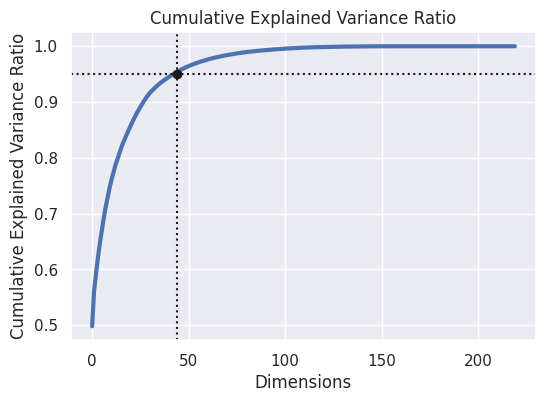

In [337]:
cumsum = np.cumsum(pca.explained_variance_ratio_)  # cumsum = cumulative sum of explained variance ratio
d = np.argmax(cumsum >= 0.95) + 1  # Find the index where cumulative explained variance ratio reaches 0.95

plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axvline(x=d, color='k', linestyle=':')
plt.axhline(y=0.95, color='k', linestyle=':')
plt.plot(d, 0.95, "ko")
plt.xlabel("Dimensions")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance Ratio")
plt.grid(True)
plt.show()

## Final Pipeline after PCA

In [338]:
# Define the final piipeline

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing_pip),
    ('pca', PCA(n_components=32))
    ])

In [339]:
# fit the final pipeline
pipeline.fit(X_train)

# Appyly preprocessing to pipeline on data
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Model Definition

Use model with category to find binary classifier (Logistic Regression, XGboost Classifier, and LighGBM Classifier)

## Logistic Regression

In [95]:
# Define Logistic Regression model

logreg_model = LogisticRegression()

## XGboost

In [96]:
# Define XGBoost model

xgb_model = xgb.XGBClassifier()

## LightGBM

In [97]:
# Define LightGBM model

lgb_model = lgb.LGBMClassifier()

# Model Training

## Logistic Regression

In [98]:
# Train Logistic Regression model

logreg_model.fit(X_train_transformed, y_train)

LogisticRegression()

Use Cross Vallidation

In [99]:
# Train Logreg with cross validation 3 times

logreg_scores = cross_val_score(logreg_model, X_train_transformed, y_train, cv=3, scoring='roc_auc')

In [100]:
print('Logistic Regression')
print('ROC AUC Score - Mean - Cross Validation: ', round(logreg_scores.mean(),3))
print('ROC AUC Score - Std - Cross Validation: ', round(logreg_scores.std(),3))

Logistic Regression
ROC AUC Score - Mean - Cross Validation:  0.66
ROC AUC Score - Std - Cross Validation:  0.004


Use Hyperparameter tuning RandomSearchCV

In [101]:
# Define the parameter grid for Logistic Regression

logreg_param_grid = {
    'C': [0.1, 1.0, 10.0],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'lbfgs', 'sag'],  # Solver algorithm
    'max_iter': [100, 200, 500]  # Maximum number of iterations
}

In [102]:
# Perform random search

logreg_random_search = RandomizedSearchCV(
    estimator=logreg_model,
    param_distributions=logreg_param_grid,
    cv=5,
    scoring='roc_auc',
    n_iter=10,
    random_state=7,
    verbose=3,
    return_train_score=True,
    n_jobs=-1)
logreg_random_search.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1.0, 10.0],
                                        'max_iter': [100, 200, 500],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'sag']},
                   random_state=7, return_train_score=True, scoring='roc_auc',
                   verbose=3)

In [103]:
# Print the best parameters and best score

print("Best Parameters:", logreg_random_search.best_params_)
print("Best Score:", logreg_random_search.best_score_)

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 1.0}
Best Score: 0.6604471502707131


## XGboost

In [104]:
# Train XGboost model

xgb_model.fit(X_train_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Use cross validation

In [105]:
score_xgb = cross_val_score(xgb_model, X_train_transformed, y_train, cv=3, scoring='roc_auc')

In [106]:
#XGB Classifier
print('XGB Classifier')
print('ROC AUC Score - Mean - Cross Validation: ', round(score_xgb.mean(),3))
print('ROC AUC Score - Std - Cross Validation: ', round(score_xgb.std(),3))

XGB Classifier
ROC AUC Score - Mean - Cross Validation:  0.63
ROC AUC Score - Std - Cross Validation:  0.001


Use Hyperparameter Tuning

In [107]:
# Define hyperparameter space
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

In [108]:
# Use RandomizedSearchCV

xgb_random_search = RandomizedSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='roc_auc', n_iter=10, random_state=7)

In [109]:
# Tuning hyperparameter with RandomizedSearchCV
xgb_random_search.fit(X_train_transformed, y_train)

# Print best parameters and best score
print("Best Parameters:", xgb_random_search.best_params_)
print("Best Score:", xgb_random_search.best_score_)

Best Parameters: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best Score: 0.6538750436236169


In [110]:
# use model with the best hyperparameter

best_xgb = xgb_random_search.best_estimator_

In [111]:
# Fit model to data training

best_xgb.fit(X_train_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## LGBM Classifier

In [112]:
lgb_model.fit(X_train_transformed, y_train)

LGBMClassifier()

In [113]:
score_lgb = cross_val_score(lgb_model, X_train_transformed, y_train, cv=3, scoring='roc_auc')

In [114]:
#LGB Classifier

print('LGBM Classifier')
print('ROC AUC Score - Mean - Cross Validation: ', round(score_lgb.mean(),3))
print('ROC AUC Score - Std - Cross Validation: ', round(score_lgb.std(),3))

LGBM Classifier
ROC AUC Score - Mean - Cross Validation:  0.649
ROC AUC Score - Std - Cross Validation:  0.001


Hyperparameter Tuning

In [115]:
# Value of hyperparameters for random search

param_lgb = {'learning_rate':[0.2,0.1,0.01,0.05,0.001],
             'num_leaves':range(10,100,10),
             'min_child_samples':range(500,1000,100),
             'reg_alpha':[0.1,0.01,0.2,0.3],
             'reg_lambda':[0.1,0.01,0.2,0.3],
             'n_estimators':range(50,300,50),
             'max_bin': range(500,1500,100)}

In [116]:
# Initialization RandomizedSearchCV

lgb_random_search = RandomizedSearchCV(lgb_model, param_lgb, cv=3, scoring='roc_auc', n_iter=10, random_state=7)

In [117]:
# Tuning hyperparameter with RandomizedSearchCV
lgb_random_search.fit(X_train_transformed, y_train)

# Print best parameters and best score
print("Best Parameters:", lgb_random_search.best_params_)
print("Best Score:", lgb_random_search.best_score_)

Best Parameters: {'reg_lambda': 0.3, 'reg_alpha': 0.01, 'num_leaves': 10, 'n_estimators': 200, 'min_child_samples': 900, 'max_bin': 1300, 'learning_rate': 0.1}
Best Score: 0.6560687571237581


# Model Evaluation

## Logistic Regression

In [118]:
best_logreg = LogisticRegression(solver= 'lbfgs', penalty= 'l2', max_iter= 100, C= 1.0)

In [119]:
# Fit the logregClassifier model
best_logreg.fit(X_train_transformed, y_train)

# Predict probabilities for the test data
logreg_train_proba = best_logreg.predict_proba(X_train_transformed)[:, 1]
logreg_test_proba = best_logreg.predict_proba(X_test_transformed)[:, 1]

# Change probability to label class using threshold 0.5
logreg_train_pred = np.where(logreg_train_proba >= 0.5, 1, 0)
logreg_test_pred = np.where(logreg_test_proba >= 0.5, 1, 0)

# Calculate the ROC AUC score
roc_auc_train = roc_auc_score(y_train, logreg_train_proba)
roc_auc_test = roc_auc_score(y_test, logreg_test_proba)
print("ROC AUC Score Train:", roc_auc_train)
print("ROC AUC Score Test:", roc_auc_test)

# show classification report
print('Training score: {:.4f}'.format(best_logreg.score(X_train_transformed, y_train)))
print(classification_report(y_train, logreg_train_pred))
print('Test score: {:.4f}'.format(best_logreg.score(X_train_transformed, y_train)))
print(classification_report(y_test, logreg_test_pred))

ROC AUC Score Train: 0.6621265326526234
ROC AUC Score Test: 0.6655096872741807
Training score: 0.6161
              precision    recall  f1-score   support

           0       0.62      0.61      0.61     19815
           1       0.62      0.62      0.62     19815

    accuracy                           0.62     39630
   macro avg       0.62      0.62      0.62     39630
weighted avg       0.62      0.62      0.62     39630

Test score: 0.6161
              precision    recall  f1-score   support

           0       0.95      0.61      0.75     56492
           1       0.13      0.63      0.21      5010

    accuracy                           0.62     61502
   macro avg       0.54      0.62      0.48     61502
weighted avg       0.88      0.62      0.70     61502



Insights from the logistic regression model:

1. Model Performance: The logistic regression model achieved a moderate level of performance, with a ROC AUC score of approximately 0.66 on both the training and test sets. This indicates that the model has some ability to discriminate between the positive (default) and negative (non-default) classes.

2. Precision and Recall: The precision and recall values for both classes (0 and 1) indicate the model's ability to correctly classify instances. For class 0 (nasabah tepat waktu), the precision and recall are approximately 0.62, indicating that the model has reasonably balanced performance in identifying non-default cases. For class 1 (nasabah gagal bayar), the precision is low at 0.13, suggesting that the model has a higher rate of false positives. However, the recall for class 1 is 0.63, indicating that the model has a better ability to identify default cases.

3. Accuracy: The overall accuracy of the model is approximately 0.62 on both the training and test sets, indicating that the model correctly predicts the class label for around 62% of the instances. It's important to note that accuracy alone may not provide a complete picture of the model's performance, especially when dealing with imbalanced datasets like this case.

4. Model Interpretation: The model's coefficients and specific features used for prediction are not provided in the information given. Understanding the significance and contribution of individual features in the logistic regression model can provide valuable insights into the factors influencing default risk prediction.

Overall, the logistic regression model shows a moderate level of performance in predicting default risk. However, it's important to further evaluate the model's performance and consider potential improvements, such as exploring additional feature engineering techniques or alternative modeling approaches.

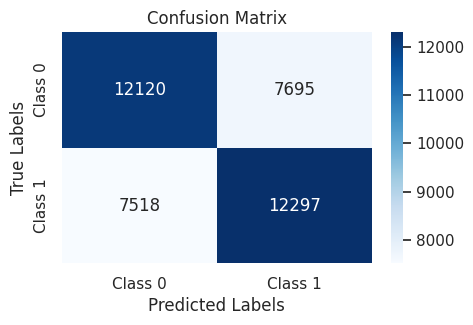

In [120]:
# Menghitung confusion matrix
cm1 = confusion_matrix(y_train, logreg_train_pred)
labels = ['Class 0', 'Class 1']

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Menambahkan judul dan label pada heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The confusion matrix provides a detailed breakdown of the model's performance by showing the number of true positives (12120), false positives (7695), false negatives (7518), and true negatives (12297). It helps evaluate the model's accuracy and identify any potential issues with misclassifications.

In this case, the model correctly predicted 12120 instances of class 0 (non-default) and 12297 instances of class 1 (default). However, it misclassified 7695 instances of class 0 as class 1 (false positives) and 7518 instances of class 1 as class 0 (false negatives). These misclassifications can have significant implications in assessing the model's performance and its ability to accurately predict defaults.

## XGBoost

In [121]:
# Predict probabilities for train and test data

xgb_train_proba = best_xgb.predict_proba(X_train_transformed)[:, 1]
xgb_test_proba = best_xgb.predict_proba(X_test_transformed)[:, 1]

In [122]:
# Calculate ROC AUC score

roc_auc_train_xgb = roc_auc_score(y_train, xgb_train_proba)
roc_auc_test_xgb = roc_auc_score(y_test, xgb_test_proba)
print("ROC AUC Score Train:", roc_auc_train_xgb)
print("ROC AUC Score Test:", roc_auc_test_xgb)

ROC AUC Score Train: 0.7229379354283239
ROC AUC Score Test: 0.6618350073202035


In [123]:
# Classification report

xgb_train_pred = best_xgb.predict(X_train_transformed)
xgb_test_pred = best_xgb.predict(X_test_transformed)

print("Training Classification Report:")
print(classification_report(y_train, xgb_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, xgb_test_pred))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66     19815
           1       0.66      0.66      0.66     19815

    accuracy                           0.66     39630
   macro avg       0.66      0.66      0.66     39630
weighted avg       0.66      0.66      0.66     39630

Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75     56492
           1       0.13      0.62      0.21      5010

    accuracy                           0.62     61502
   macro avg       0.54      0.62      0.48     61502
weighted avg       0.88      0.62      0.71     61502



Insights from the XGBoost model:

1. Model Performance: The XGBoost model achieved a relatively higher ROC AUC score of approximately 0.72 on the training set and 0.66 on the test set. This indicates that the model has a good ability to discriminate between the positive (default) and negative (non-default) classes.

2. Precision and Recall: The precision and recall values for both classes (0 and 1) indicate the model's ability to correctly classify instances. Both classes have similar precision and recall scores of around 0.66, indicating that the model has balanced performance in identifying both non-default and default cases.

3. Accuracy: The overall accuracy of the model is approximately 0.66 on the training set and 0.62 on the test set, indicating that the model correctly predicts the class label for around 66% and 62% of the instances, respectively.

4. Model Interpretation: The specific features used by the XGBoost model and their importance in the prediction are not provided in the given information. Understanding the importance and contribution of individual features in the model can provide valuable insights into the factors influencing default risk prediction.

Overall, the XGBoost model shows relatively better performance compared to the previous logistic regression model, with higher ROC AUC scores. However, the model's need further evaluation and refinement may be necessary to improve the model's accuracy and overall predictive power.

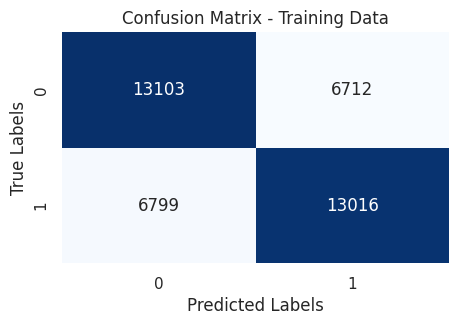

In [124]:
# Confusion matrix
cm_train1 = confusion_matrix(y_train, xgb_train_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm_train1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

The confusion matrix provides a detailed breakdown of the model's performance by showing the number of true positives (13103), false positives (6712), false negatives (6799), and true negatives (13016). It helps evaluate the model's accuracy and identify any potential issues with misclassifications.

In this case, the model correctly predicted 13103 instances of class 0 (non-default) and 13016 instances of class 1 (default). However, it misclassified 6712 instances of class 0 as class 1 (false positives) and 6799 instances of class 1 as class 0 (false negatives). These misclassifications can have significant implications in assessing the model's performance and its ability to accurately predict defaults.

## LGBM Classifier

In [125]:
# use best hyperparameter

best_lgb = lgb_random_search.best_estimator_

In [126]:
# Fit model to data training

best_xgb.fit(X_train_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [127]:
# Predict probabilities for train and test data

lgb_train_proba = best_lgb.predict_proba(X_train_transformed)[:, 1]
lgb_test_proba = best_lgb.predict_proba(X_test_transformed)[:, 1]

In [128]:
# Calculate ROC AUC score

roc_auc_train_lgb = roc_auc_score(y_train, lgb_train_proba)
roc_auc_test_lgb = roc_auc_score(y_test, lgb_test_proba)
print("ROC AUC Score Train:", roc_auc_train_lgb)
print("ROC AUC Score Test:", roc_auc_test_lgb)

ROC AUC Score Train: 0.7164795274787876
ROC AUC Score Test: 0.6677439428301932


In [129]:
# Classification report

lgb_train_pred = best_lgb.predict(X_train_transformed)
lgb_test_pred = best_lgb.predict(X_test_transformed)

print("Training Classification Report:")
print(classification_report(y_train, lgb_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, lgb_test_pred))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.66      0.66     19815
           1       0.66      0.65      0.65     19815

    accuracy                           0.66     39630
   macro avg       0.66      0.66      0.66     39630
weighted avg       0.66      0.66      0.66     39630

Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.63      0.76     56492
           1       0.13      0.62      0.21      5010

    accuracy                           0.63     61502
   macro avg       0.54      0.63      0.49     61502
weighted avg       0.88      0.63      0.71     61502



Insights from the LightGBM model:

1. Model Performance: The LightGBM model demonstrates a moderate level of performance. The ROC AUC score on the training set is approximately 0.7165, indicating a decent ability of the model to distinguish between positive and negative instances. The ROC AUC score on the test set is 0.6677, suggesting a similar performance on unseen data.

2. Precision and Recall: The precision and recall values provide insights into the model's ability to correctly classify instances for each class. In the training set, both classes have precision and recall values around 0.65-0.66, indicating a relatively balanced performance in identifying both positive (class 1) and negative (class 0) cases.

3. Accuracy: The overall accuracy of the model on the training set is approximately 0.66, indicating that the model correctly predicts the class label for around 66% of the instances. However, it's important to assess the model's performance on the test set to evaluate its generalization ability.

4. Test Set Performance: The model's performance on the test set is slightly lower than on the training set. The accuracy drops to approximately 0.63, suggesting a slight decrease in performance when predicting on unseen data. The precision for class 1 is low at 0.13, indicating a high rate of false positives. However, the recall for class 1 is 0.62, indicating that the model has a better ability to identify positive cases in the test set.

5. Model Interpretability: The information provided does not include the specific interpretation of features or their importance in the LightGBM model. Understanding the significant features and their impact on the model's predictions can provide valuable insights into the factors influencing default risk prediction.

Overall, the LightGBM model exhibits a moderate level of performance in predicting default risk.

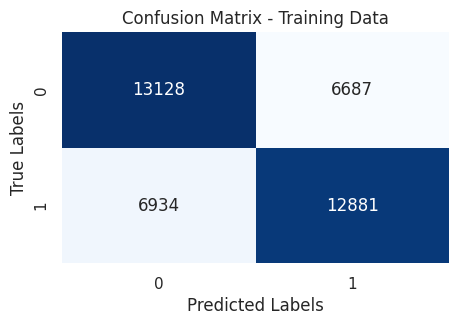

In [130]:
# Confusion matrix
cm_train2 = confusion_matrix(y_train, lgb_train_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm_train2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

The confusion matrix provides insights into the model's performance in terms of correctly and incorrectly classified instances for each class.

Insights from the confusion matrix:

* True Positive (TP): There are 13,128 instances that are correctly classified as class 0 (negative).
* False Positive (FP): There are 6,687 instances that are incorrectly classified as class 1 (positive) when they are actually class 0.
* False Negative (FN): There are 6,934 instances that are incorrectly classified as class 0 when they are actually class 1.
* True Negative (TN): There are 12,881 instances that are correctly classified as class 1.

These numbers allow us to calculate additional performance metrics such as precision, recall, and F1-score, which provide a more comprehensive evaluation of the model's predictive ability.

It's important to note that without knowing the total number of instances in each class, we cannot determine the accuracy, precision, recall, or F1-score directly from the confusion matrix alone.

# EDA Modelling

After comparing the three models, XGB Classifier has the highest ROC AUC value. We will use this model to predict customer credit.

In [154]:
# using best XGBoost model
predictions = best_xgb.predict(X_test_transformed)

# Make DataFrame with prediction colum
predictions_df = pd.DataFrame(predictions, columns=['Prediction'])

# Combine DataFrame df and predictions_df by indeks
merged_df = pd.concat([df, predictions_df], axis=1)

# Add a new column 'Result Predict' based on the condition of 'Predicted Label' matching 'True Label'
merged_df['Result Predict'] = merged_df['Prediction'] == merged_df['TARGET']
merged_df['Result Predict'] = merged_df['Result Predict'].replace({True: 'True', False: 'False'})

# Reset the index
merged_df = merged_df.reset_index(drop=True)

# Show DataFrame
merged_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AGE,AGE_CATEGORY,YEAR_EMPLOYED,Year Employed,YEAR_REGISTRATION,Year Registration,INCOME_RANGE,CREDIT_RANGE,Prediction,Result Predict
0,100002.00,1.00,Cash loans,M,N,Y,0.00,202500.00,406597.50,24700.50,...,26.00,Young Adult,2.00,1-9,10.00,1-9,200k-250k,400k-450k,0.00,False
1,100003.00,0.00,Cash loans,F,N,N,0.00,270000.00,1293502.50,35698.50,...,46.00,Adult,3.00,1-9,3.00,1-9,250k-300k,1M+,1.00,False
2,100004.00,0.00,Revolving loans,M,Y,Y,0.00,67500.00,135000.00,6750.00,...,52.00,Adult,1.00,NaN,12.00,10-25,50k-100k,100k-150k,0.00,True
3,100006.00,0.00,Cash loans,F,N,Y,0.00,135000.00,312682.50,29686.50,...,52.00,Adult,8.00,1-9,27.00,26-35,100k-150k,300k-350k,0.00,True
4,100007.00,0.00,Cash loans,M,N,Y,0.00,121500.00,513000.00,21865.50,...,55.00,Older,8.00,1-9,12.00,10-25,100k-150k,500k-600k,1.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456253.00,0.00,Cash loans,F,N,Y,0.00,153000.00,677664.00,29979.00,...,41.00,Adult,22.00,10-25,18.00,10-25,150k-200k,600k-700k,NaN,False
307505,456254.00,1.00,Cash loans,F,N,Y,0.00,171000.00,370107.00,20205.00,...,33.00,Young Adult,13.00,10-25,7.00,1-9,150k-200k,350k-400k,NaN,False
307506,456255.00,0.00,Cash loans,F,N,N,0.00,157500.00,675000.00,49117.50,...,46.00,Adult,3.00,1-9,14.00,10-25,150k-200k,600k-700k,NaN,False
307507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,False


To gain a clearer understanding of the interpretation of the confusion matrix, further exploratory data analysis (EDA) was conducted between the predicted results and the original data, aligning them with the predicted outcomes according to the confusion matrix.

The EDA involved examining the images and their corresponding labels to compare them with the predicted labels. By visually inspecting the images, it was possible to assess whether the model's predictions aligned with the actual content of the images and their true labels.

By conducting this analysis, it becomes possible to investigate potential reasons behind the false negative and false positive predictions. This additional step helps to provide more context and insights into the model's performance, allowing for a deeper understanding of its strengths and weaknesses

## Correct 0 (Non-Default) Prediction

In [159]:
correct_0 = merged_df[(merged_df['TARGET'] == 0) & (merged_df['Prediction'] == 0)]
correct_0


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AGE,AGE_CATEGORY,YEAR_EMPLOYED,Year Employed,YEAR_REGISTRATION,Year Registration,INCOME_RANGE,CREDIT_RANGE,Prediction,Result Predict
2,100004.00,0.00,Revolving loans,M,Y,Y,0.00,67500.00,135000.00,6750.00,...,52.00,Adult,1.00,NaN,12.00,10-25,50k-100k,100k-150k,0.00,True
3,100006.00,0.00,Cash loans,F,N,Y,0.00,135000.00,312682.50,29686.50,...,52.00,Adult,8.00,1-9,27.00,26-35,100k-150k,300k-350k,0.00,True
7,100010.00,0.00,Cash loans,M,Y,Y,0.00,360000.00,1530000.00,42075.00,...,52.00,Adult,1.00,NaN,13.00,10-25,350k-400k,1M+,0.00,True
8,100011.00,0.00,Cash loans,F,N,Y,0.00,112500.00,1019610.00,33826.50,...,55.00,Older,-1001.00,NaN,20.00,10-25,100k-150k,1M+,0.00,True
10,100014.00,0.00,Cash loans,F,N,Y,1.00,112500.00,652500.00,21177.00,...,28.00,Young Adult,2.00,1-9,12.00,10-25,100k-150k,600k-700k,0.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61491,171316.00,0.00,Cash loans,F,N,N,1.00,103500.00,545040.00,26640.00,...,28.00,Young Adult,0.00,NaN,0.00,NaN,100k-150k,500k-600k,0.00,True
61492,171317.00,0.00,Cash loans,M,Y,N,1.00,270000.00,1078200.00,34911.00,...,49.00,Adult,9.00,1-9,12.00,10-25,250k-300k,1M+,0.00,True
61493,171318.00,0.00,Cash loans,F,Y,N,1.00,270000.00,534204.00,50076.00,...,44.00,Adult,5.00,1-9,22.00,10-25,250k-300k,500k-600k,0.00,True
61497,171324.00,0.00,Cash loans,M,N,N,1.00,135000.00,263686.50,28107.00,...,35.00,Adult,2.00,1-9,17.00,10-25,100k-150k,250k-300k,0.00,True


## Incorrect 0 (Non-Default) Prediction

In [160]:
incorrect_0 = merged_df[(merged_df['TARGET'] == 0) & (merged_df['Prediction'] == 1)]
incorrect_0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AGE,AGE_CATEGORY,YEAR_EMPLOYED,Year Employed,YEAR_REGISTRATION,Year Registration,INCOME_RANGE,CREDIT_RANGE,Prediction,Result Predict
1,100003.00,0.00,Cash loans,F,N,N,0.00,270000.00,1293502.50,35698.50,...,46.00,Adult,3.00,1-9,3.00,1-9,250k-300k,1M+,1.00,False
4,100007.00,0.00,Cash loans,M,N,Y,0.00,121500.00,513000.00,21865.50,...,55.00,Older,8.00,1-9,12.00,10-25,100k-150k,500k-600k,1.00,False
5,100008.00,0.00,Cash loans,M,N,Y,0.00,99000.00,490495.50,27517.50,...,46.00,Adult,4.00,1-9,14.00,10-25,50k-100k,450k-500k,1.00,False
6,100009.00,0.00,Cash loans,F,Y,Y,1.00,171000.00,1560726.00,41301.00,...,38.00,Adult,9.00,1-9,3.00,1-9,150k-200k,1M+,1.00,False
9,100012.00,0.00,Revolving loans,M,N,Y,0.00,135000.00,405000.00,20250.00,...,40.00,Adult,6.00,1-9,40.00,35-55,100k-150k,400k-450k,1.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61481,171304.00,0.00,Cash loans,M,Y,Y,0.00,202500.00,518562.00,23562.00,...,44.00,Adult,5.00,1-9,5.00,1-9,200k-250k,500k-600k,1.00,False
61494,171319.00,0.00,Cash loans,F,N,Y,0.00,112500.00,508495.50,34249.50,...,41.00,Adult,15.00,10-25,24.00,10-25,100k-150k,500k-600k,1.00,False
61495,171321.00,0.00,Cash loans,F,N,Y,0.00,202500.00,1097676.00,32224.50,...,52.00,Adult,10.00,1-9,3.00,1-9,200k-250k,1M+,1.00,False
61496,171323.00,0.00,Cash loans,M,Y,Y,0.00,157500.00,254700.00,25321.50,...,53.00,Adult,4.00,1-9,37.00,35-55,150k-200k,250k-300k,1.00,False


## Correct 1 (Default) Prediction

In [161]:
correct_1 = merged_df[(merged_df['TARGET'] == 1) & (merged_df['Prediction'] == 1)]
correct_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AGE,AGE_CATEGORY,YEAR_EMPLOYED,Year Employed,YEAR_REGISTRATION,Year Registration,INCOME_RANGE,CREDIT_RANGE,Prediction,Result Predict
42,100049.00,1.00,Cash loans,F,N,N,0.00,135000.00,288873.00,16258.50,...,37.00,Adult,10.00,1-9,0.00,NaN,100k-150k,250k-300k,1.00,True
110,100130.00,1.00,Cash loans,F,N,Y,1.00,157500.00,723996.00,30802.50,...,29.00,Young Adult,1.00,NaN,1.00,NaN,150k-200k,700k-800k,1.00,True
138,100160.00,1.00,Cash loans,M,N,Y,0.00,292500.00,675000.00,36747.00,...,46.00,Adult,1.00,NaN,14.00,10-25,250k-300k,600k-700k,1.00,True
163,100192.00,1.00,Cash loans,F,N,N,0.00,111915.00,225000.00,21037.50,...,22.00,Young Adult,0.00,NaN,7.00,1-9,100k-150k,200k-250k,1.00,True
180,100209.00,1.00,Revolving loans,M,N,Y,3.00,180000.00,540000.00,27000.00,...,42.00,Adult,3.00,1-9,2.00,1-9,150k-200k,500k-600k,1.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61248,171032.00,1.00,Cash loans,M,Y,N,0.00,135000.00,592560.00,35937.00,...,35.00,Adult,0.00,NaN,1.00,NaN,100k-150k,500k-600k,1.00,True
61285,171072.00,1.00,Cash loans,F,N,Y,1.00,157500.00,450000.00,30573.00,...,45.00,Adult,2.00,1-9,3.00,1-9,150k-200k,400k-450k,1.00,True
61314,171104.00,1.00,Cash loans,F,N,Y,2.00,54000.00,157500.00,17091.00,...,32.00,Young Adult,5.00,1-9,10.00,1-9,50k-100k,150k-200k,1.00,True
61415,171229.00,1.00,Cash loans,F,N,Y,0.00,360000.00,787131.00,26014.50,...,32.00,Young Adult,4.00,1-9,2.00,1-9,350k-400k,700k-800k,1.00,True


## Incorrect 1 (Default) Prediction

In [162]:
Incorrect_1 = merged_df[(merged_df['TARGET'] == 1) & (merged_df['Prediction'] == 0)]
Incorrect_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AGE,AGE_CATEGORY,YEAR_EMPLOYED,Year Employed,YEAR_REGISTRATION,Year Registration,INCOME_RANGE,CREDIT_RANGE,Prediction,Result Predict
0,100002.00,1.00,Cash loans,M,N,Y,0.00,202500.00,406597.50,24700.50,...,26.00,Young Adult,2.00,1-9,10.00,1-9,200k-250k,400k-450k,0.00,False
26,100031.00,1.00,Cash loans,F,N,Y,0.00,112500.00,979992.00,27076.50,...,51.00,Adult,7.00,1-9,18.00,10-25,100k-150k,900k-1M,0.00,False
40,100047.00,1.00,Cash loans,M,N,Y,0.00,202500.00,1193580.00,35028.00,...,48.00,Adult,3.00,1-9,3.00,1-9,200k-250k,1M+,0.00,False
81,100096.00,1.00,Cash loans,F,N,Y,0.00,81000.00,252000.00,14593.50,...,68.00,Older,-1001.00,NaN,15.00,10-25,50k-100k,250k-300k,0.00,False
94,100112.00,1.00,Cash loans,M,Y,Y,0.00,315000.00,953460.00,64107.00,...,28.00,Young Adult,6.00,1-9,13.00,10-25,300k-350k,900k-1M,0.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61318,171108.00,1.00,Cash loans,F,Y,Y,1.00,157500.00,545040.00,26509.50,...,31.00,Young Adult,6.00,1-9,5.00,1-9,150k-200k,500k-600k,0.00,False
61335,171130.00,1.00,Cash loans,M,N,Y,2.00,157500.00,601470.00,30838.50,...,37.00,Adult,6.00,1-9,21.00,10-25,150k-200k,600k-700k,0.00,False
61392,171204.00,1.00,Cash loans,F,N,N,0.00,157500.00,260640.00,23904.00,...,28.00,Young Adult,0.00,NaN,7.00,1-9,150k-200k,250k-300k,0.00,False
61437,171253.00,1.00,Cash loans,M,N,Y,0.00,76500.00,243000.00,12852.00,...,61.00,Older,-1001.00,NaN,36.00,35-55,50k-100k,200k-250k,0.00,False


## NPL Prediction

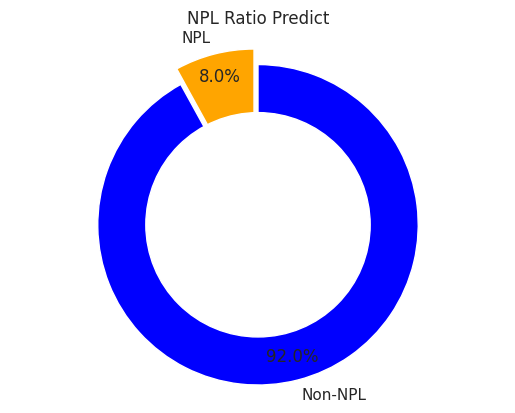

In [137]:
# Menghitung Total NPL
total_npl_prediction = merged_df.loc[merged_df['Prediction'] == 1.00, 'AMT_CREDIT'].sum()

# Menghitung Total Kredit
total_kredit1 = merged_df['AMT_CREDIT'].sum()

# Menghitung Rasio NPL
rasio_npl_predict = (total_npl_prediction / total_kredit1) * 100

# Menghitung Rasio Non-NPL
rasio_non_npl_predict = 100 - rasio_npl_predict

# Membuat donut chart
labels = ['NPL', 'Non-NPL']
sizes = [rasio_npl_predict, rasio_non_npl_predict]
colors = ['orange', 'blue']
explode = (0.1, 0)  # memberikan efek exploded pada bagian NPL

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# Membuat lingkaran di tengah sebagai hole dalam donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Menambahkan judul
plt.title('NPL Ratio Predict')

# Menampilkan donut chart
plt.axis('equal')
plt.show()

Using the XGboost model on the df dataset increases the NPL ratio to 8.0% from the previous 7.5%

# Model Saving

In [340]:
# Define the final pipeline

pipeline_final = Pipeline(steps=[
    ('preprocessing', preprocessing_pip),  # Preprocessing pipeline
    ('pca', PCA(n_components=32)),  # PCA step
    ('model', best_xgb)
    ])

In [341]:
pipeline_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('normal_dist',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['DAYS_BIRTH',
                                                   'DAYS_ID_PUBLISH',
                                                   'HOUR_APPR_PROCESS_START',
                                                   'EXT_SOURCE_2',
                                                   'EXT_SOURCE_3']),
                                                 ('skew_dist',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['CNT_...
                               feature_types=None, gamma=0.1, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [342]:
# Save the combined pipeline
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline_final, file)

# Save the list of numeric columns
with open('normal_dist.json', 'w') as file:
    json.dump(normal_dist, file)

with open('skewed_dist.json', 'w') as file:
    json.dump(skew_dist, file)

# Save the list of categorical columns (object type)
with open('cat_cols.json', 'w') as file:
    json.dump(cat_cols, file)

# Save the list of categorical columns (number type)
with open('cat_num_cols.json', 'w') as file:
    json.dump(cat_num_cols, file)

with open('columns_to_drop.json', 'w') as file:
    json.dump(columns_to_drop, file)

# Conclusion

## EDA Conclusion

1. Our target is inbalence data with ratio 0 = 91.9% and 1 = 8.1%
2. Our Customer purpose loan for having car and property
3. Our NPL credit ratio in 7.5%

## Model Conclusion

The overall conclusion is that the XGBoost Classifier model that has been trained and adjusted with hyperparameter tuning gives better performance in predicting the probability of default on a loan. However, it is important to remember that these results are based on current data and need further validation and evaluation using new data and considering broader business and decision factors before making an accurate and informed decision.